In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

# Data Understanding

## Ad hoc Exploratory Data Analysis

### plotting utility

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import seaborn as sns

def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))

    if type not in {'boxplot', 'kdeplot', 'scatterplot'}:
        print("type= {boxplot, kdeplot, scatterplot} only are supported")
        return


    maxCols = 4

    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5 * numCols)
    fig.set_figheight(3 * numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

    if numRows == 1 and numCols == 1:
        c = columns[0]
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        elif type == 'kdeplot':
            sns.kdeplot(data=data, x=c, ax=axs)
        else:
            sns.scatterplot(data=data, x=c, y=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        for c in columns:
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            elif type == 'kdeplot':
                sns.kdeplot(data=data, x=c, ax=axs[i])
            else:
                sns.scatterplot(data=data, x=c, y=c, ax=axs[i])
            axs[i].set_title(c)
            i = i + 1

    else:
        i = j = 0
        for c in columns:
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i, j])
            elif type == 'kdeplot':
                sns.kdeplot(data=data, x=c, ax=axs[i, j])
            else:
                sns.scatterplot(data=data, x=c, y=c, ax=axs[i, j])
            axs[i, j].set_title(c)
            j = j + 1
            if j == 4:
                i = i + 1
                j = 0



### Descriptive analytics:

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]


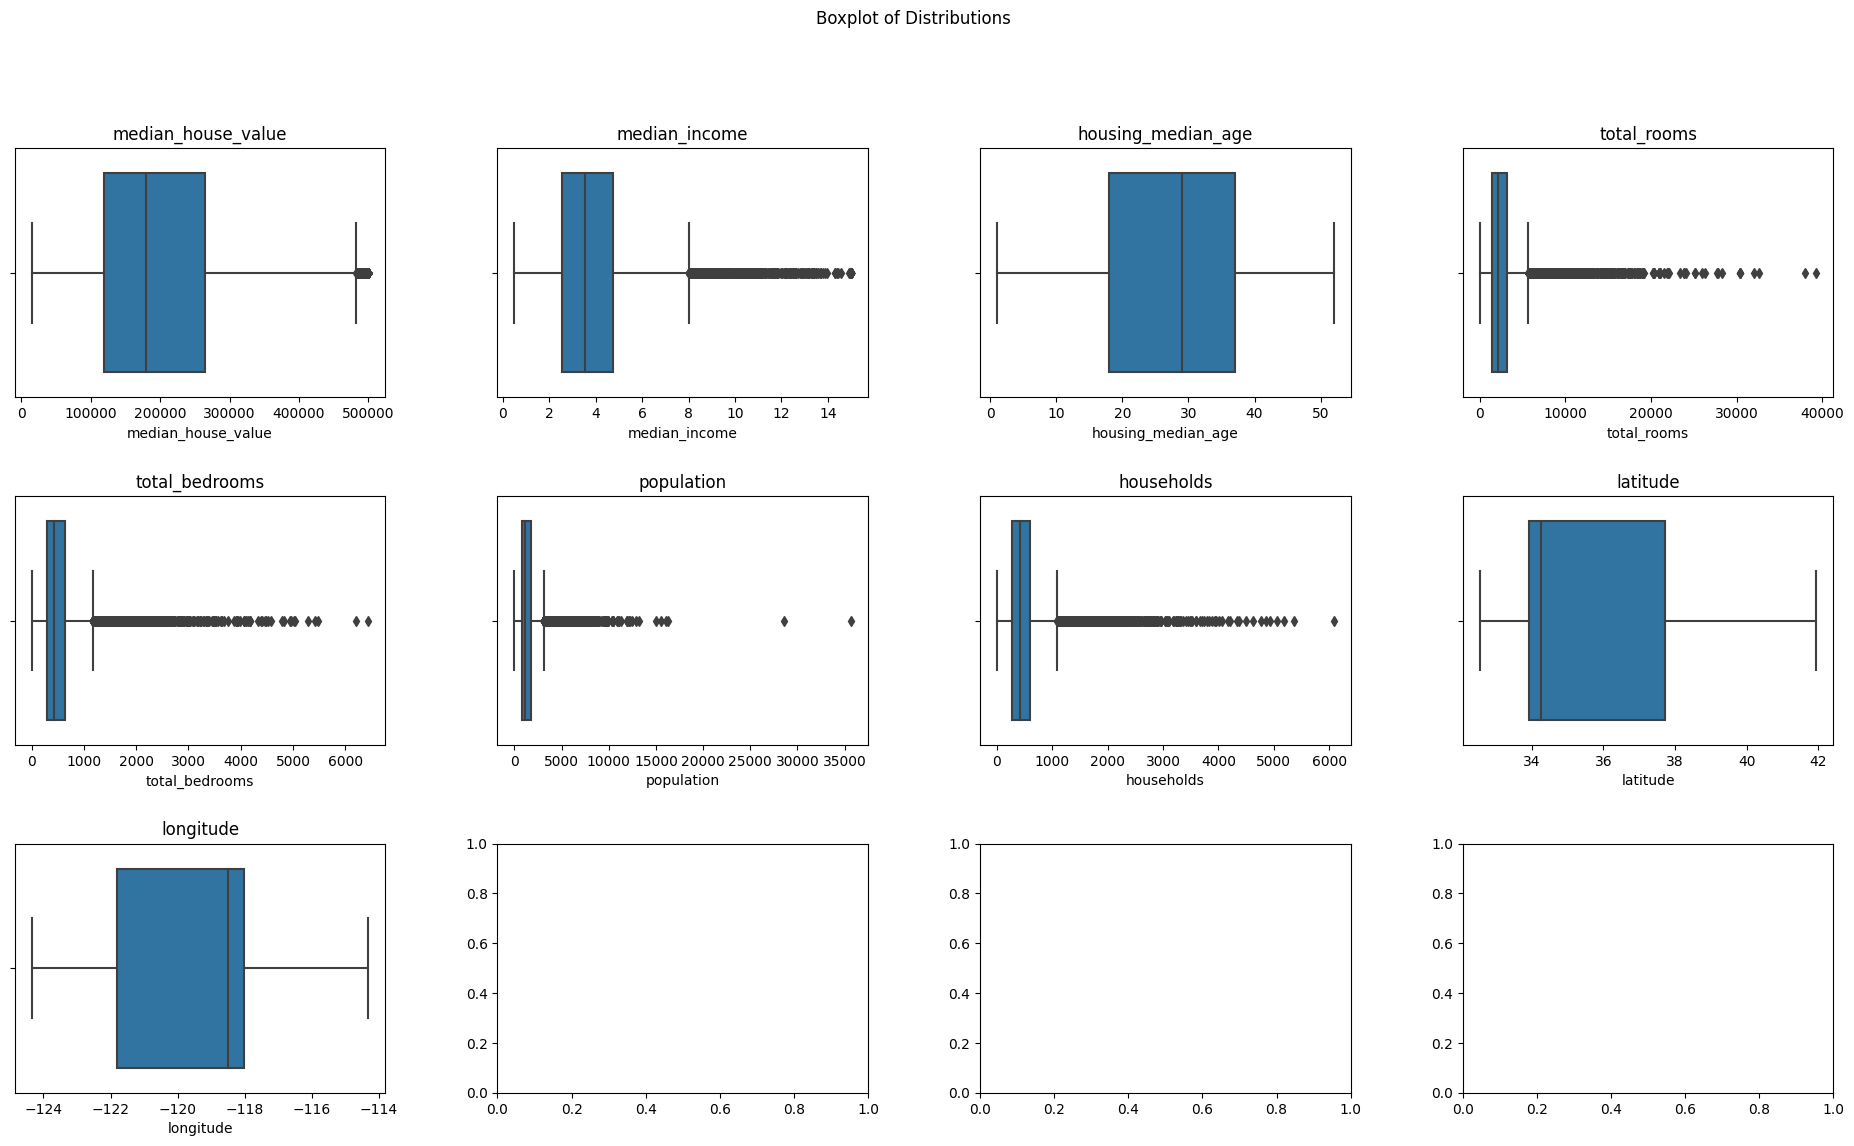

In [ ]:
plot_distributions(houses, houses.columns, type='boxplot', title='Boxplot of Distributions')


------------------------------
***Boxplot conclusions***
  
This boxplot provides an efficient visual method to identify records with high or low numbers of statistical outliers.

Looking at the boxplot, 4 columns have very high amounts of outliers: total_rooms, total_bedrooms, population, & households. Median_income also has quite a lot of outliers but not as much as the 4 I have identified. While 'median_house_value' does not have many outliers, there are still some present in the dataset. Latitude and longitude have none. [1]

Based on this observation, the columns I will focus on for outlier detection are:
1. total_rooms
2. total_bedrooms
3. population
4. households
5. median_income


The boxplot also shows me that my dataset needs to go through normalisation as the values differ significantly from column to column.

In both latitude and longitude the 4 sections of the box plot are uneven in size. This shows that my values cluster around a certain location. This tells me to explore location and see where my values generally lie around. I decided to do this below using the documentations for vega-altair. [2]

-----------------------------

In [ ]:
import altair as alt
from vega_datasets import data

# Load the US states map data
states = alt.topo_feature(data.us_10m.url, feature='states')

# Create a chart for the US map with styling
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')


# Create a chart for points, sampling 5000 data points from 'houses'
points = alt.Chart(houses.sample(n=5000)).mark_circle(
    size=10,
    color='steelblue'
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q'
)

# Overlay the points on the map
background + points


alt.LayerChart(...)

---

According to this projection, I can see that all of my points are in california and mainly cluster around the two most populated cities: Los Angeles and San Francisco.
This will help me understand my data points by aiding me in establishing a baseline. By knowing that the majority of my data is centered around specific geographical locations, I can define a baseline for normal behavior. Data points outside this expected range might be flagged as potential anomalies.

---

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]


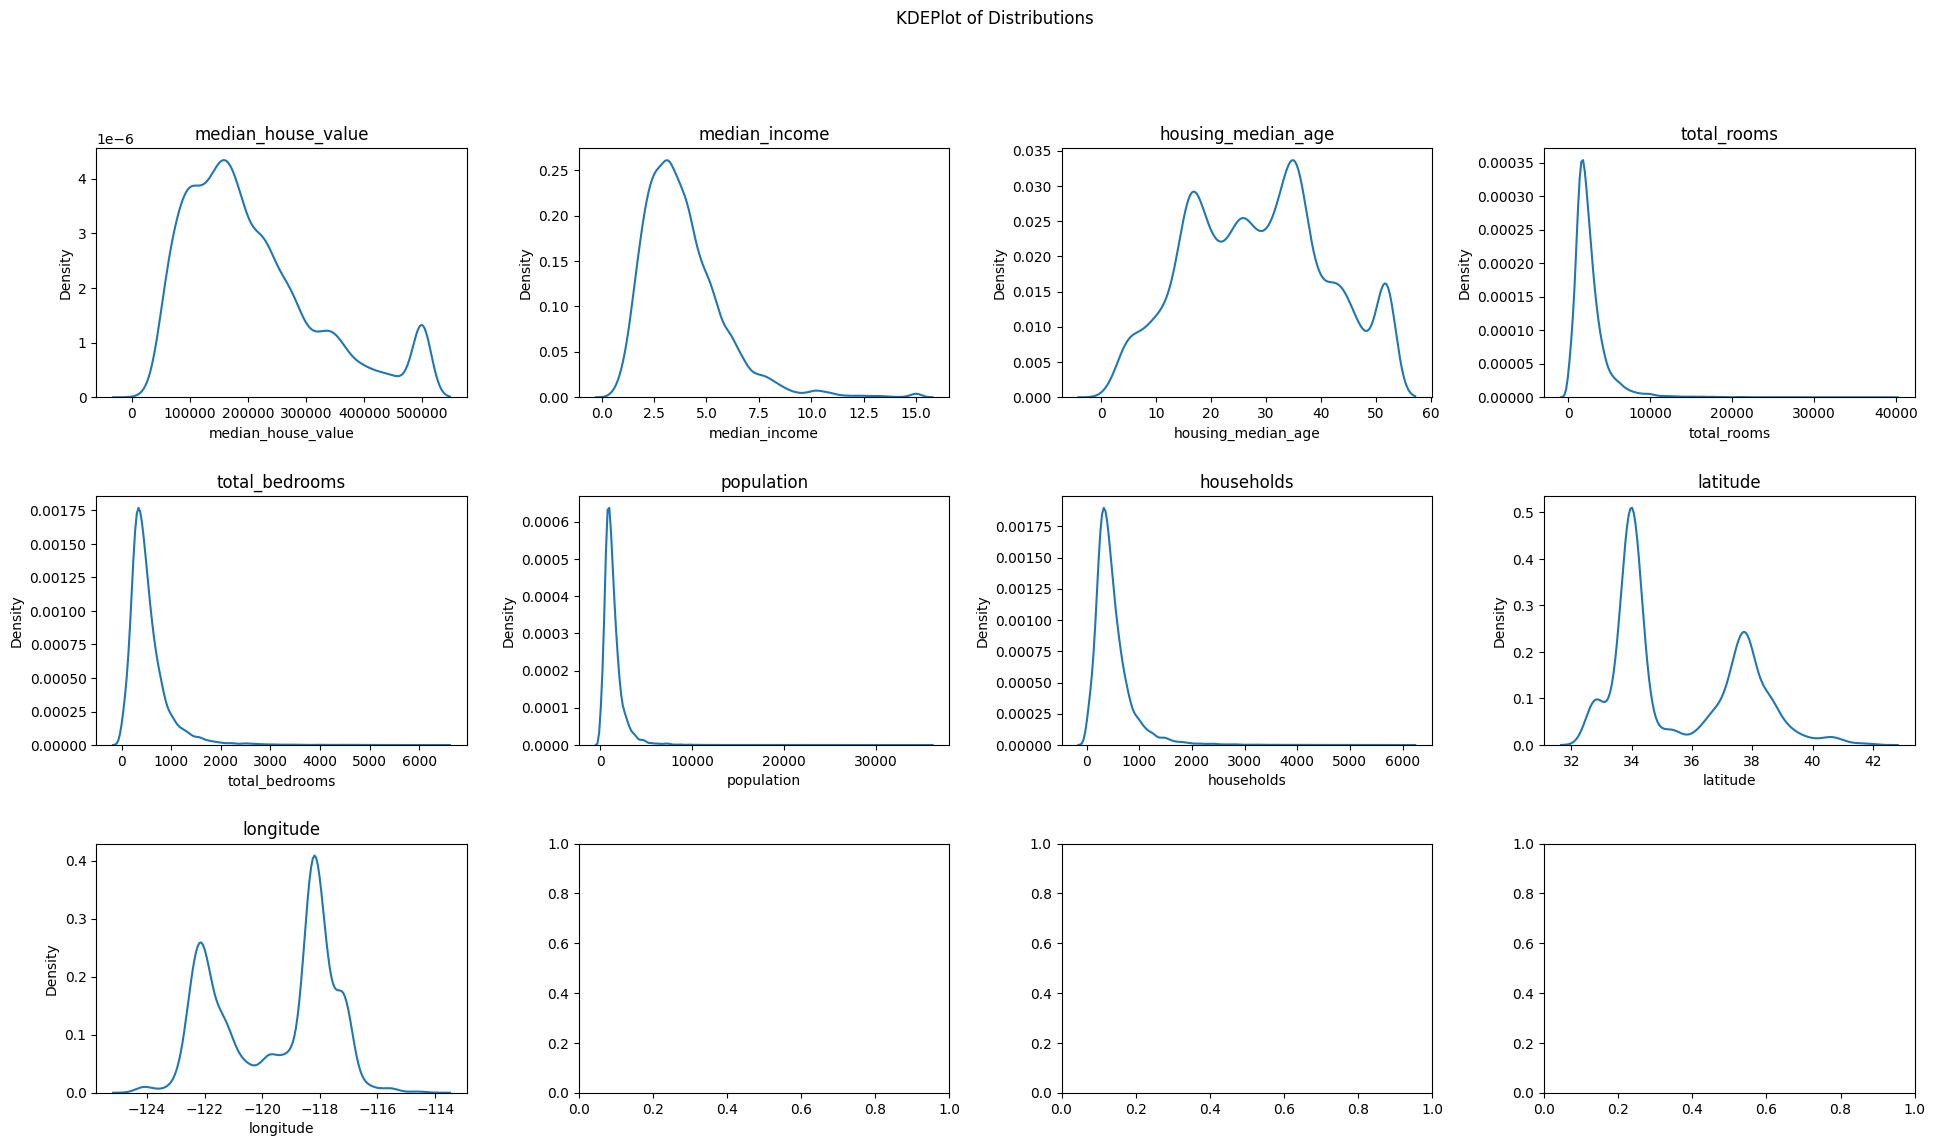

In [ ]:
plot_distributions(houses, houses.columns, type='kdeplot', title='KDEPlot of Distributions')




---
***KDE Plot Conclusions***

The kdeplot allows me to understand the distribution of the data and helps me identify peaks, valleys, and any irregularities. The tails give me the same insight as the boxplot above for identifying columns with outliers.
- From this data, I can see that total_rooms has the smallest peak at 0.00035 which shows me that it has less clusters than the rest. Clusters allow me to identify anomalies quicker, so the wide distribution of total_rooms might not be as helpful in visually identifying anomalies as the rest of my features.
- From the points I have chosen, median_income has the highest amount of clusters. Visualising median_income will help me identify anomalies better.


---



### feature normalisation

Some of the features need to be normalised before any conclusion can be drawn



---


***Explanation for Scaling and Normalisation***

I have used a MinMaxScaler from sklearn to normalise my database. I have come to this conclusion after researching best scalers for outlier detection. According to my research, the two most common ones that are sensitive to outlier detection are: StandardScaler and MinMaxScaler. Both are very sensitive to the presence of outliers but according to scikitlearn: StandardScaler cannot guarantee balanced feature scales in the presence of outliers [3] .
This led me to use MinMaxScaler which seemed like a good fit for my dataset because it scales the data between 0 and 1, maintaining the relative difference between values.


---



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the 'houses' DataFrame
scaler.fit(houses)

# Transform 'houses' using the fitted scaler
houses_normalized = scaler.transform(houses)

# Convert the normalized data back to a DataFrame
houses_normalized_df = pd.DataFrame(houses_normalized, columns=houses.columns)

# Print the normalized DataFrame
print(houses_normalized_df)

       median_house_value  median_income  housing_median_age  total_rooms  \
0                0.902266       0.539668            0.784314     0.022331   
1                0.708247       0.538027            0.392157     0.180503   
2                0.695051       0.466028            1.000000     0.037260   
3                0.672783       0.354699            1.000000     0.032352   
4                0.674638       0.230776            1.000000     0.041330   
...                   ...            ...                 ...          ...   
20635            0.130105       0.073130            0.470588     0.042296   
20636            0.128043       0.141853            0.333333     0.017676   
20637            0.159383       0.082764            0.313725     0.057277   
20638            0.143713       0.094295            0.333333     0.047256   
20639            0.153403       0.130253            0.294118     0.070782   

       total_bedrooms  population  households  latitude  longitude  
0     

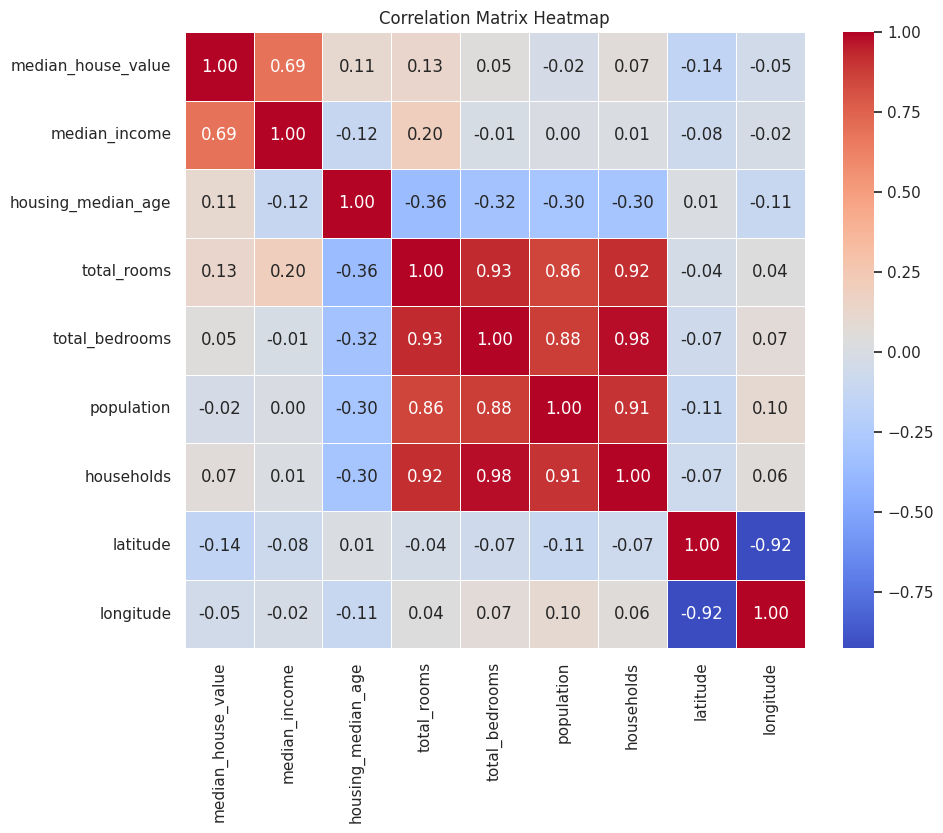

In [ ]:
# Calculate the correlation matrix for the normalized houses data
correlation_matrix = houses_normalized_df.corr()

# Set the style of the seaborn plots
sns.set(style='white')

# Plot the graph
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



---

**Heatmap Conclusions:**

Based on the heatmap, I can identify the correlations between my features and can see that the features that have the most correlations is total_rooms, total_bedrooms, population and households. This will help me with my feature extraction.



---





# Feature Extraction


Rationale

---


Based on my EDA of the boxplot, KDE plot, and heatmap I have concluded valuable insights into potential outliers. The choice of features for identifying potential outliers:

1. ***total_rooms:***
- Boxplot: total_rooms was identified as having a very high amount of outliers.
- KDE plot: shows a small peak at 0.00035, indicating fewer clusters. However, this also suggests that there are data points with unusually high values in total_rooms, making it a feature worth investigating for outliers.
- Heatmap: It also has positive correlations with my other features: total_bedrooms (0.93), population (0.86), and households (0.92). This indicates that high values in *total_rooms* might be associated with similar patterns in these related features.
2. ***total_bedrooms:***
- Boxplot: Similar to total_rooms, total_bedrooms was highlighted in the boxplot as having a substantial number of outliers.
- KDE plot: visualises this by showing a peak at 0.0175. This will help me identify outliers because visualising them as clusters help identify anomalies.
- Heatmap: My heatmap also helped me pick this feature as it is strongly correlated with my other features: total_rooms (0.93), population (0.88), and households(0.98).

3. ***population:***
- Boxplot: identified population as having a high number of outliers.
- KDEPlot: My population has a peak at 0.006 in my KDEPlot  implying a concentrated region of data points which will help visually see if the anomalies that have been identified are correct, as unusual or anomalous behavior often stands out as deviations from the norm.
- Heatmap: It also helped that population has a strong correlation with my other features = total_rooms (0.86), total_bedrooms (0.88), and households(0.91).

4. ***households:***
- Boxplot: high number of outliers
- KDEPlot: peak at 0.0175 implying a cluster, which will help me visually identify anomalies
- Heatmap:  total_rooms (0.92), total_bedrooms (0.98), and population(0.91)

5. **housing_median_age:**
When two variables are highly correlated, they may contain redundant information. This redundancy can make it more difficult to visually identify anomalies because changes in one variable might be closely mirrored by changes in the other. Anomalies in one variable might not be apparent when examining the other if their behavior is highly synchronized.
- Heatmap: I have included this value because it has a very low correlation with my other values which will help me plot them against each other and visually identify anomalies in my dataset: total_rooms (-0.36), total_bedrooms (-0.32), households(-0.30) and population(-0.30)

---




In [ ]:
# Select specific features for analysis
selected_features = ['housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households']

# Create a new DataFrame 'filtered_houses' with only the selected features
filtered_houses = houses_normalized_df[selected_features]

# Display the first 3 rows of the filtered DataFrame
filtered_houses.head(3)


,housing_median_age,total_rooms,total_bedrooms,population,households
0,0.784314,0.022331,0.019863,0.008941,0.020556
1,0.392157,0.180503,0.171477,0.067210,0.186976
2,1.000000,0.037260,0.029330,0.013818,0.028943


# Non Algorithmic Outlier Detection

### Rationale

---


In order to detect outliers using non-algorithmic methods I chose:
1. IQR Scores

IQR Scores are good for univariate and bivariate data to identify outliers as it considers the median as a measure of dispersion to detect extreme values but is limited to multivariate datasets while dealing with huge numbers of numeric features. [4]

My data is not univariate or bivariate but I wanted to see how accurate it could be and to explore the data so I chose three features to apply this method:
-  total_rooms, total_bedrooms, households:
to observe how it behaves with different features that all have high amounts of outliers



2. Z Scores

Z_scores measure how far raw data is from the mean in the standard deviation unit and has an advantage over its application at normally distributed data sets. [4]

For Z_Scores I chose two different methods:

- Column-wise Approach

- Record-Wise Aggregated Approach

---



## IQR Score

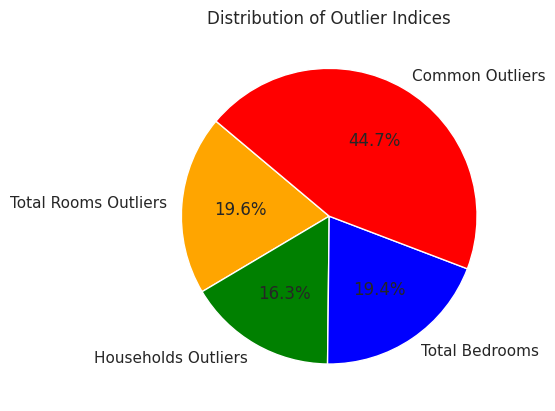

In [ ]:
from matplotlib_venn import venn2


Q1 = filtered_houses['total_rooms'].quantile(0.25)
Q3 = filtered_houses['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

# Filtering outliers using IQR for total rooms
IQR_removal_data = filtered_houses[(filtered_houses['total_rooms'] >= Q1 - 1.5 * IQR) & (filtered_houses['total_rooms'] <= Q3 + 1.5 * IQR)]

outliers_indices1 = filtered_houses.index.difference(IQR_removal_data.index)


Q1 = filtered_houses['households'].quantile(0.25)
Q3 = filtered_houses['households'].quantile(0.75)
IQR = Q3 - Q1

# Filtering outliers using IQR for households
IQR_removal_data = filtered_houses[(filtered_houses['households'] >= Q1 - 1.5 * IQR) & (filtered_houses['households'] <= Q3 + 1.5 * IQR)]

outliers_indices2 = filtered_houses.index.difference(IQR_removal_data.index)


common_indices = set(outliers_indices1) & set(outliers_indices2)


# Calculate the percentage of common indices
total_unique_indices = len(set(outliers_indices1) | set(outliers_indices2))  # Union of unique indices
percentage_common_indices = len(common_indices) / total_unique_indices * 100



Q1 = filtered_houses['total_bedrooms'].quantile(0.25)
Q3 = filtered_houses['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Filtering outliers using IQR for total bedrooms
IQR_removal_data = filtered_houses[(filtered_houses['total_bedrooms'] >= Q1 - 1.5 * IQR) & (filtered_houses['total_bedrooms'] <= Q3 + 1.5 * IQR)]

outliers_indices3 = filtered_houses.index.difference(IQR_removal_data.index)


common_indices = set(outliers_indices1) & set(outliers_indices2)


set1 = set(outliers_indices1)
set2 = set(outliers_indices2)
set3 = set(outliers_indices3)

set1_set2 = set1.intersection(set2)
common_indices = set1_set2.intersection(set3)
# Calculate the lengths of each set
len_set1 = len(set1)
len_set2 = len(set2)
len_set3 = len(set3)
len_common_indices = len(common_indices)

# Data for the pie chart
sizes = [len_set1 - len_common_indices, len_set2 - len_common_indices, len_set3 - len_common_indices, len_common_indices]
labels = ['Total Rooms Outliers', 'Households Outliers', 'Total Bedrooms', 'Common Outliers']
colors = ['orange', 'green', 'blue', 'red']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Outlier Indices')

plt.show()






---


### ***Conclusions for IQR Score:***
The pie chart illustrates the common and distinct outlier indices identified throughout the different features (total_rooms, total_bedrooms, households) using the IQR score method. The goal was to assess whether the IQR Score consistently identified anomalies or if its performance varied significantly with different features.

The results revealed notable differences in outlier detection across features, with only 44.7% commonality in identified outliers. This discrepancy suggests that the IQR Score might not be a robust method for outlier detection when applied to diverse features. Its effectiveness seems to depend on the nature of the dataset, and it may perform better in scenarios with either univariate or bivariate distributions.




---








## Z Score

***Rationale***

---

For z-score I tried two different methods:

1- Column-wise Z-Scores: z-scores are calculated using the means and standard deviations of each column independently. This means that for each column, the mean and standard deviation are calculated separately, and then the z-scores are computed for each element based on its column's mean and standard deviation.

- This method is suitable when you want to standardize the values within each variable without considering the relationships between variables.
- We want to identify indexes of records so this approach won't be useful but I calculated it anyway to be able to compare between the record-wise approach.

2- Record-wise aggregated z-scores: The mean and standard deviation are calculated for each column across all records, and then the z-scores are computed for each element based on the mean and standard deviation of its column.

---



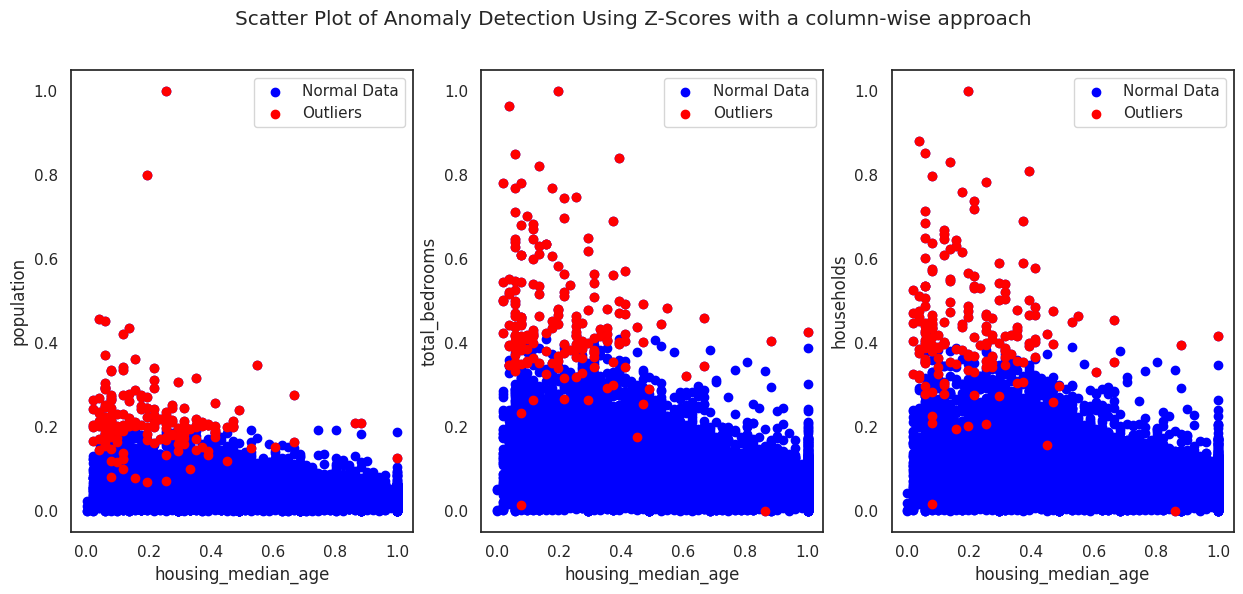

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the Z-score threshold
zscore_threshold = 5

# Calculate the mean of each column in the 'filtered_houses' DataFrame
means = filtered_houses[filtered_houses.columns].mean()
# Calculate the standard deviation of each column in the 'filtered_houses' DataFrame
stds = filtered_houses[filtered_houses.columns].std()


# Z-score is calculated as (value - mean) / standard deviation
z_scores = ((filtered_houses[filtered_houses.columns] - means) / stds)

# Identify outliers as those records where the absolute Z-score is greater than the threshold
outliers = (np.abs(z_scores) > zscore_threshold).any(axis=1)

# Extract records from 'filtered_houses' that are classified as outliers
outliers_records = filtered_houses[outliers]


# Plot the graphs

figure, axs = plt.subplots(1, 3, figsize=(15, 6))
figure.suptitle('Scatter Plot of Anomaly Detection Using Z-Scores with a column-wise approach')

axs[0].scatter(filtered_houses['housing_median_age'], filtered_houses['population'], label='Normal Data', color='blue')

axs[0].scatter(outliers_records['housing_median_age'], outliers_records['population'], label='Outliers', color='red')

axs[0].set_xlabel('housing_median_age')
axs[0].set_ylabel('population')
axs[0].legend()


axs[1].scatter(filtered_houses['housing_median_age'], filtered_houses['total_bedrooms'], label='Normal Data', color='blue')

axs[1].scatter(outliers_records['housing_median_age'], outliers_records['total_bedrooms'], label='Outliers', color='red')

axs[1].set_xlabel('housing_median_age')
axs[1].set_ylabel('total_bedrooms')
axs[1].legend()

axs[2].scatter(filtered_houses['housing_median_age'], filtered_houses['households'], label='Normal Data', color='blue')

axs[2].scatter(outliers_records['housing_median_age'], outliers_records['households'], label='Outliers', color='red')

axs[2].set_xlabel('housing_median_age')
axs[2].set_ylabel('households')
axs[2].legend()
plt.show()


In [ ]:
print(outliers_records)

       housing_median_age  total_rooms  total_bedrooms  population  households
570              0.078431     0.473880        0.447548    0.208078    0.446802
576              0.215686     0.364057        0.317194    0.161944    0.329880
864              0.254902     0.411949        0.464308    0.227417    0.468015
865              0.254902     0.379343        0.420081    0.224474    0.428383
871              0.039216     0.356376        0.443824    0.201855    0.452557
...                   ...          ...             ...         ...         ...
20424            0.058824     0.424793        0.419460    0.173323    0.362769
20427            0.058824     0.396002        0.344662    0.153928    0.353725
20440            0.098039     0.412534        0.358163    0.187701    0.341885
20451            0.078431     0.640546        0.546245    0.335015    0.571781
20530            0.196078     0.381912        0.466636    0.223689    0.486926

[181 rows x 5 columns]


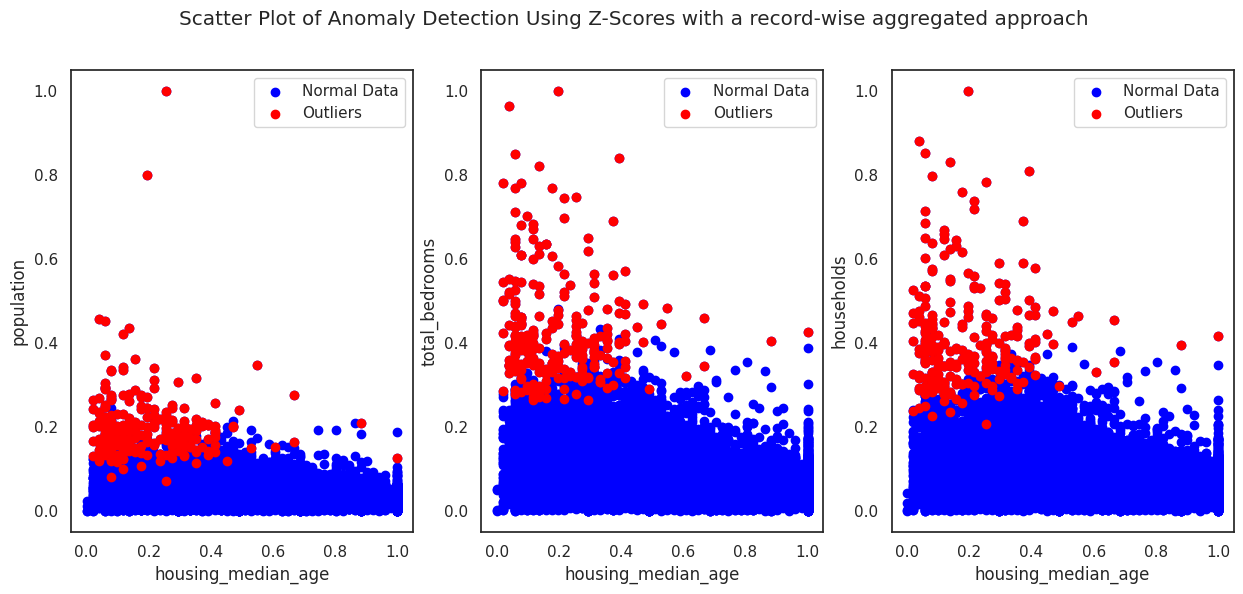

In [ ]:
import pandas as pd

# Calculate z-scores for each record
z_scores = (filtered_houses - filtered_houses.mean()) / filtered_houses.std()

z_scores['z_score'] = z_scores.abs().mean(axis=1)

threshold = 3

figure, axs = plt.subplots(1, 3, figsize=(15, 6))
figure.suptitle('Scatter Plot of Anomaly Detection Using Z-Scores with a record-wise aggregated approach')


# Find records (rows) with z-scores above the threshold
outliers_records = filtered_houses[z_scores['z_score'] > threshold]
# Scatter plot with 'median_income' on the x-axis and 'total_rooms' on the y-axis

axs[0].scatter(filtered_houses['housing_median_age'], filtered_houses['population'], label='Normal Data', color='blue')

axs[0].scatter(outliers_records['housing_median_age'], outliers_records['population'], label='Outliers', color='red')

axs[0].set_xlabel('housing_median_age')
axs[0].set_ylabel('population')
axs[0].legend()


axs[1].scatter(filtered_houses['housing_median_age'], filtered_houses['total_bedrooms'], label='Normal Data', color='blue')

axs[1].scatter(outliers_records['housing_median_age'], outliers_records['total_bedrooms'], label='Outliers', color='red')

axs[1].set_xlabel('housing_median_age')
axs[1].set_ylabel('total_bedrooms')
axs[1].legend()

axs[2].scatter(filtered_houses['housing_median_age'], filtered_houses['households'], label='Normal Data', color='blue')

axs[2].scatter(outliers_records['housing_median_age'], outliers_records['households'], label='Outliers', color='red')

axs[2].set_xlabel('housing_median_age')
axs[2].set_ylabel('households')
axs[2].legend()
plt.show()

Detected outliers for Z-scores

In [ ]:
print(outliers_records)

       housing_median_age  total_rooms  total_bedrooms  population  households
283              0.411765     0.326568        0.317660    0.139634    0.323302
570              0.078431     0.473880        0.447548    0.208078    0.446802
576              0.215686     0.364057        0.317194    0.161944    0.329880
780              0.333333     0.253345        0.315022    0.157235    0.319849
864              0.254902     0.411949        0.464308    0.227417    0.468015
...                   ...          ...             ...         ...         ...
20440            0.098039     0.412534        0.358163    0.187701    0.341885
20451            0.078431     0.640546        0.546245    0.335015    0.571781
20529            0.215686     0.267231        0.339075    0.157796    0.351422
20530            0.196078     0.381912        0.466636    0.223689    0.486926
20563            0.156863     0.308688        0.409528    0.191541    0.387601

[246 rows x 5 columns]


### Comparison between column-wise approach for Z-scores and record-wise aggregated approach for Z-scores

Comparing between the IQR Score and Z-Score:

Column-wise approach for z- ccores detected 181 records and record-wise aggregated approach for Z-scores detected 609 records.


Graphs conclusion:
Looking at the graphs, the column-wise approach for z- ccores resulted in fewer false negatives. However, the record-wise aggregated approach for Z-scores reduced the number of false positives, as there were proportionately fewer cases of values marked as outliers that fell within normal distribution bounds


These findings suggest that record-wise aggregated approach for Z-scores may be better suited for outlier elimination in this dataset. The lower false positive rate ensures that records removed from the analysis are truly anomalies that could skew statistical tests or distort summary figures for the data. Although some borderline cases may be missed, retaining data points that are not severe outliers aids overall accuracy and precision more than eliminating every minor deviation. Essentially, the record-wise aggregated approach for Z-scores strikes an optimal balance between sensitivity and specificity for outlier detection purposes in this analytical context


Note:

The thresholds I used was a matter of trial-and-error and these were the best thresholds I could achieve with the least amount of false positives and negatives.

# Algorithmic Outlier Detection

Rationale

---
KNN Algorithm



The proposed KNN method detects outliers by exploiting the relationship among neighborhoods in data points.  KNN is used in an unsupervised learning manner. In this scenario, the algorithm finds the closest K nearest neighbors for every data point and measures the average distance.  [5]

The reason I chose KNN is for a couple reasons:
1. Sensitivity to Local Patterns:

      KNN is known for its ability to capture local patterns and relationships within the data.[6] In the context of outlier detection, anomalies often manifest as deviations from the local structure of the data rather than global patterns. KNN, being sensitive to local variations, is well-suited for identifying such anomalies.

2. Non-Parametric Approach:
      KNN is a non-parametric algorithm [7], meaning it makes fewer assumptions about the underlying distribution of the data. This flexibility is advantageous in outlier detection scenarios where the data distribution may not conform to a specific parametric form. KNN can adapt to various data distributions and is not limited by assumptions that may constrain other methods.

3. Adaptability to Data Complexity:

      Outlier patterns can be complex and may involve non-linear relationships. KNN's flexibility allows it to adapt to the complexity of the data, making it effective in scenarios where outliers may exhibit intricate patterns that other methods might struggle to capture.



In order to see which values to plot against each other I used a heatmap and chose values that have a low correlation.
I tested the performance of this algorithm by plotting it with different features and comparing the performance. In order to choose my threshold, I plotted three different thresholds (0.1) (0.2), (0.08).

---



KNN Algorithm
---



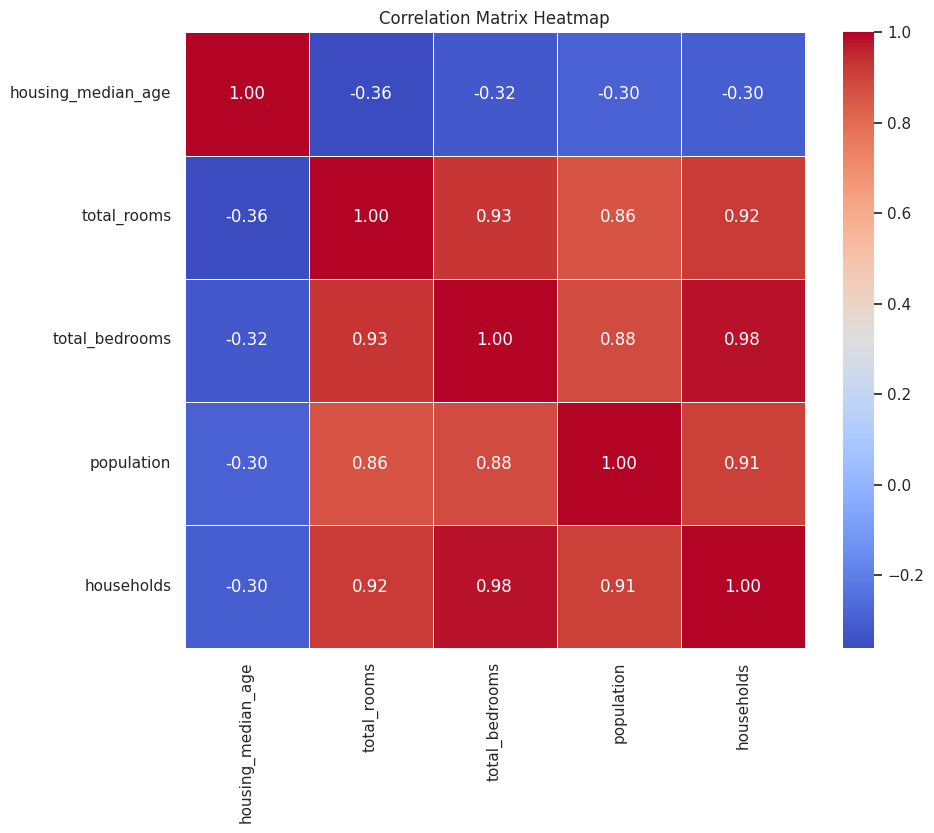

In [ ]:
correlation_matrix = filtered_houses.corr()
sns.set(style='white')  # Set the style of the heatmap

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


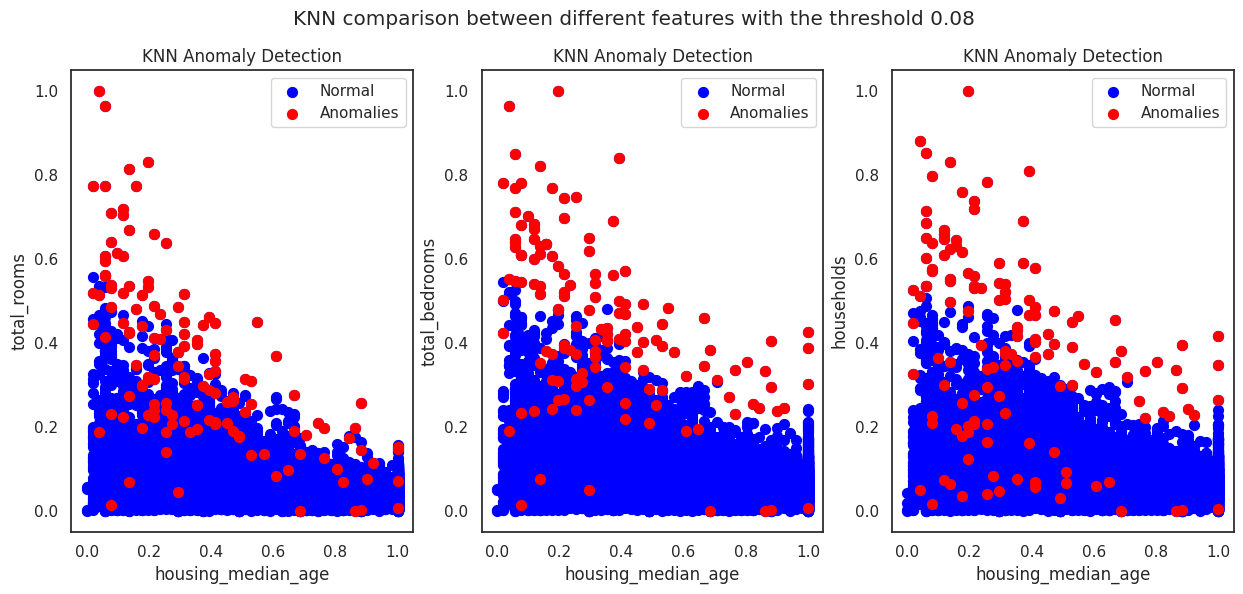

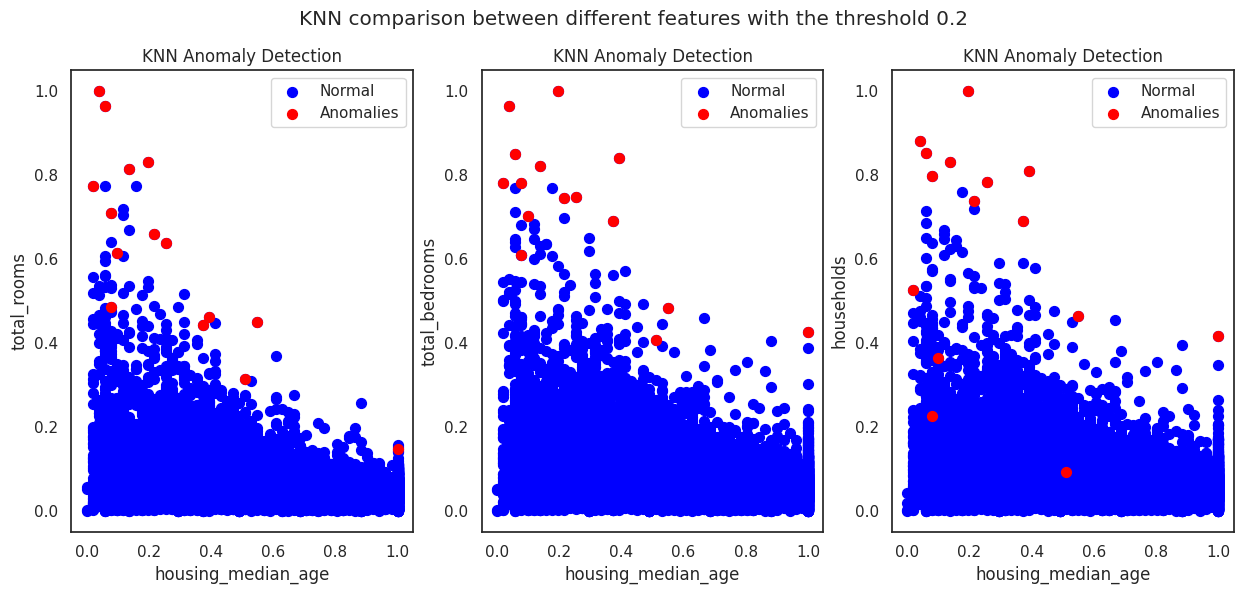

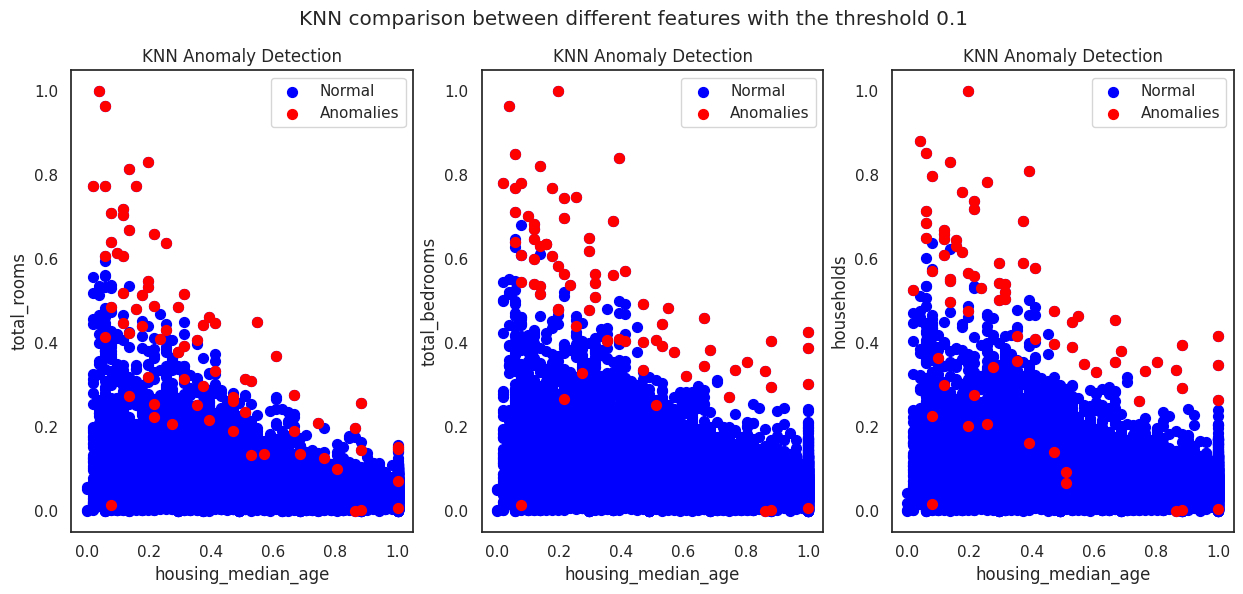

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

anomalies_KNN = []

def scatter_plot(threshold):
  # Create a KNN model
    knn_model = NearestNeighbors(n_neighbors=5)  # Example with 5 neighbors
    knn_model.fit(filtered_houses)

    distances, indices = knn_model.kneighbors(filtered_houses)

    threshold = threshold  # Set a suitable threshold
    anomalies = filtered_houses[distances.max(axis=1) > threshold]
    anomalies_KNN.append(anomalies)
    figure, axs = plt.subplots(1, 3, figsize=(15, 6))
    # Plot the data
    figure.suptitle(f'KNN comparison between different features with the threshold {threshold}')
    axs[0].scatter(filtered_houses['housing_median_age'], filtered_houses['total_rooms'], label='Normal', s=50, color='blue')

    axs[0].scatter(anomalies['housing_median_age'], anomalies['total_rooms'], label='Anomalies', s=50, color='red', marker='o')

    axs[0].set_xlabel('housing_median_age')
    axs[0].set_ylabel('total_rooms')
    axs[0].set_title('KNN Anomaly Detection')
    axs[0].legend()


    axs[1].scatter(filtered_houses['housing_median_age'], filtered_houses['total_bedrooms'], label='Normal', s=50, color='blue')

    axs[1].scatter(anomalies['housing_median_age'], anomalies['total_bedrooms'], label='Anomalies', s=50, color='red', marker='o')

    axs[1].set_xlabel('housing_median_age')
    axs[1].set_ylabel('total_bedrooms')
    axs[1].set_title('KNN Anomaly Detection')
    axs[1].legend()

    axs[2].scatter(filtered_houses['housing_median_age'], filtered_houses['households'], label='Normal', s=50, color='blue')

    axs[2].scatter(anomalies['housing_median_age'], anomalies['households'], label='Anomalies', s=50, color='red', marker='o')

    axs[2].set_xlabel('housing_median_age')
    axs[2].set_ylabel('households')
    axs[2].set_title('KNN Anomaly Detection')
    axs[2].legend()


    plt.show()

scatter_plot(0.08)
scatter_plot(0.2)
scatter_plot(0.1)

anomalies_threshold08 = anomalies_KNN[0]




---
KNN Conclusion:


These graphs help me visualise the best threshold to use to detect anomalies and how it differs. I used housing_median_age for the x-axis out of all of them because it has a low correlation between my other features which have a lot of anomalies and high correlations between each other. I came to this conclusion because I tried plotting both high and low correlated features and this gave me the best visualization.



Comparing my thresholds:


- 0.08 identified 137 columns


- 0.2 identified 15 columns


- 0.1 identified 75 columns

When I visually compare them, the threshold that gives me the best value is 0.08. While it does introduce a higher number of false positives, the trade-off is acceptable, especially considering that a threshold of 0.1 results in a notable increase in false negatives. By opting for a threshold of 0.08, I strike a balance that minimizes the sacrifice of data while still effectively capturing anomalies in my dataset.

---



## Your overall conclusions here

### Comparison Between NON-Algorithmic and Algorithmic Approach

In [ ]:
# Find common anomalies between 'outliers_records' and 'anomalies_threshold08' which is Zscore and KNN with the the threshold 0.08
common_anomalies = outliers_records.index.intersection(anomalies_threshold08.index)

# Identify anomalies that are unique to 'outliers_records' and not present in 'anomalies_threshold08'
different_anomalies_outliers_records = outliers_records.index.difference(anomalies_threshold08.index)

# Identify anomalies that are unique to 'anomalies_threshold08' and not present in 'outliers_records'
different_anomalies_threshold08 = anomalies_threshold08.index.difference(outliers_records.index)

# Display the results
print("Common Anomalies:")
print(outliers_records.loc[common_anomalies])

print("\nAnomalies in outliers_records but not in anomalies_threshold08:")
print(outliers_records.loc[different_anomalies_outliers_records])

print("\nAnomalies in anomalies_threshold08 but not in outliers_records:")
print(anomalies_threshold08.loc[different_anomalies_threshold08])


Common Anomalies:
       housing_median_age  total_rooms  total_bedrooms  population  households
922              0.117647     0.718653        0.599472    0.341938    0.608453
1010             0.313725     0.517626        0.541899    0.245663    0.541358
1021             0.411765     0.373849        0.342800    0.187505    0.366880
1060             0.215686     0.372069        0.511639    0.210600    0.536260
3603             0.411765     0.212320        0.421477    0.255949    0.403059
...                   ...          ...             ...         ...         ...
17770            0.274510     0.207539        0.329454    0.246363    0.342871
18209            0.392157     0.326899        0.500466    0.203761    0.501727
18346            0.372549     0.297752        0.561297    0.213038    0.590035
18985            0.666667     0.276387        0.345282    0.276801    0.353725
20451            0.078431     0.640546        0.546245    0.335015    0.571781

[84 rows x 5 columns]

Anomalies 

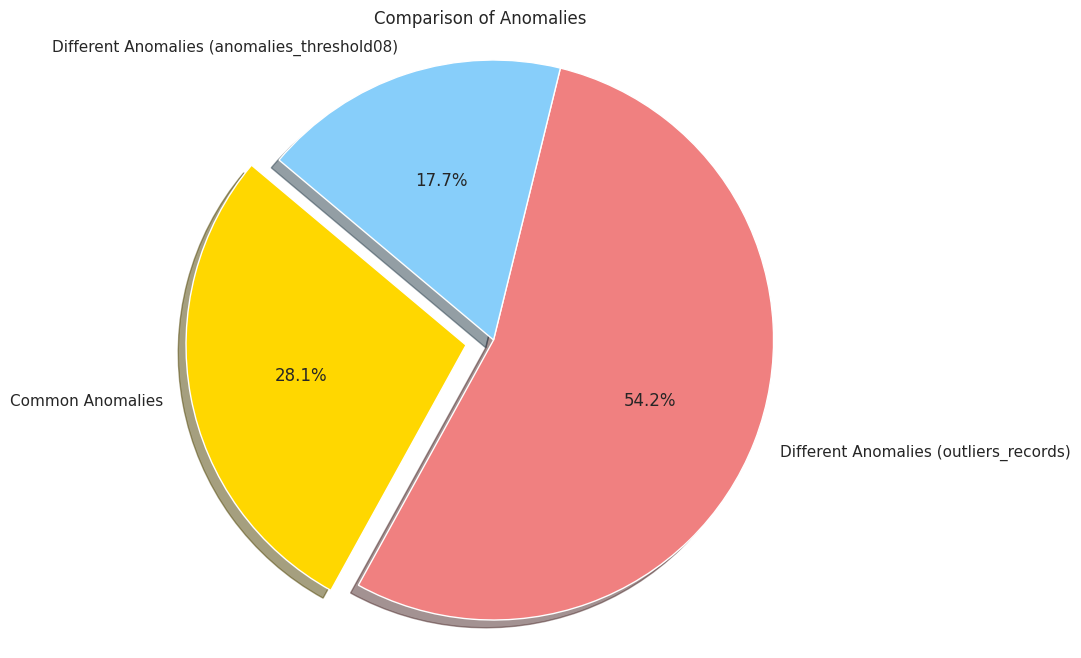

In [ ]:
labels = ['Common Anomalies', 'Different Anomalies (outliers_records)', 'Different Anomalies (anomalies_threshold08)']
sizes = [len(common_anomalies), len(different_anomalies_outliers_records), len(different_anomalies_threshold08)]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Comparison of Anomalies')
plt.show()


**Non-algorithmic Approach identified:** 246 outliers


**Algorithmic identifie**d: 137 outliers

**Common**: 84 outliers

Based on this, I can see that there are certain common behaviours between the two approaches. However, algorithmic approach performs better because non-algorithmic approach identified a lot of false positives.

Compared to my Z-score, the KNN algorithm performs better for anomaly detection because it effectively captures anomalies that may not be well-characterized by simple statistical measures. In contrast, Z-score relies on assumptions about the normal distribution of data, and if the data does not conform to these assumptions, it may be less effective in detecting anomalies, especially in cases where they are not easily represented by standard statistical measures.






### Benefits/detriments of algorithmic and non algorithmic outlier


Non-algorithmic
---
**Benefits**:
1. Non-algorithmic approaches involve straightforward rules or thresholds (e.g., Z-scores, IQR Scores), making them easy to understand.
2. Easy to implement, especially for simple datasets and when specific domain knowledge is available.
3. Because of their simplicity, non-algorithmic methods can provide immediate results, which is beneficial for time-sensitive applications.
4. They generally require fewer computational resources, making them more accessible for use in environments with limited processing power.
**Detriments**:
1. May not adapt well to complex, non-linear patterns and varying data distributions.
2. Results can be sensitive to the choice of predefined thresholds, which might not be suitable for all datasets.

Algorithmic
---

**Benefits**:
1. Can capture complex relationships and patterns in the data, making them more suitable for diverse datasets.
2. Algorithms often rely less on manually set thresholds, allowing them to adapt to the specific characteristics of the data.
3. Can handle large datasets and high-dimensional spaces.
4. KNN can be effective when the distribution of the data is not known, and it's particularly useful when anomalies form clusters or are not easily characterized by simple statistical measures.

**Detriments**:
1. Results may be less interpretable compared to simple rule-based methods.
2. May require careful tuning of algorithm parameters to achieve optimal results.
3. Performance can vary based on the nature of the data and the appropriateness of the chosen algorithm.


# References

[1] Wellbeing@school, “Understanding and interpreting box plots | Wellbeing@School,” Wellbeingatschool.org.nz, 2019. https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

[2] “Point map — Vega-Altair 5.2.0 documentation,” altair-viz.github.io. https://altair-viz.github.io/gallery/point_map.html (accessed Dec. 14, 2023).

[3] “Compare the effect of different scalers on data with outliers — scikit-learn 0.20.3 documentation,” Scikit-learn.org, 2018. https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

[4] S. Shukla, “Outliers Detection Using IQR, Z-score, LOF and DBSCAN,” Analytics Vidhya, Oct. 29, 2022. https://www.analyticsvidhya.com/blog/2022/10/outliers-detection-using-iqr-z-score-lof-and-dbscan/

[5] K. Bharadkar, “Outlier/Anomalies Detection Using Unsupervised Machine Learning,” Medium, Sep. 13, 2022. https://kunalbharadkar.medium.com/outlier-anomalies-detection-using-unsupervised-machine-learning-8a25e66de85c#:~:text=An%20absolute%20gem (accessed Dec. 15, 2023).

[6] Wikipedia Contributors, “k-nearest neighbors algorithm,” Wikipedia, Mar. 19, 2019. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

[7] M. Chatterjee, “A Quick Introduction to KNN Algorithm,” Great Learning Blog: Free Resources what Matters to shape your Career!, Feb. 03, 2020. https://www.mygreatlearning.com/blog/knn-algorithm-introduction/#:~:text=KNN%20is%20a%20lazy%20learning